# Practical 5: Approximation in Value Space

Author: CAMERON STROUD

Student Number: n11552123

### Learning Outcomes:
- Heuristic Value function
- Parametric Approximation

We will require the following library for this practical (Import all necessary libraries before running the codes):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: Heuristic Value Function
Recall the grid world in Practical 4. Consider a robot navigating in a grid-based environment. Each cell in the grid represents a distinct state of the surroundings. The robot can take four deterministic actions at each cell: "up," "down," "left," and "right," resulting in the robot to move precisely one cell in the corresponding direction on the grid. Actions that would take the agent off the grid are not allowed. Within the grid, certain states (orange) correspond to undesirable conditions, such as rough terrain, while one state (green) represents the ultimate goal.

Upon reaching the goal state, the robot gains a reward of 1. Conversely, traversing the rough terrain incurs a penalty (or negative reward) of 10. Additionally, every move the robot makes entails a penalty of 1. The robot's primary objective is to efficiently reach the goal state, aiming to maximize the total reward (minimize the total penalty) incurred. This entails both avoiding the rough terrain and efficiently navigating through the grid.

<img src="grid_world3.png" alt="Image" width="300" height="300" />

### Q1
__Upon observing the grid world, what do you intuit as the optimal policy?__

\[DOWN DOWN DOWN DOWN\]  
\[RIGHT RIGHT DOWN DOWN\]  
\[UP RIGHT RIGHT DOWN\]  
\[UP LEFT RIGHT . \]

### Q2
Complete the following code that utilizes a heuristic value function to compute a sub-optimal policy.

In [2]:
# Define the grid world
grid = np.array([
    [0, 0, -10, 0],
    [0, 0, 0, 0],
    [0, -10, 0 , 0],
    [0, 0, -10, 1]
])

# Define the goal state
goal_state = (3, 3)

Define a heuristic cost-to-go function at the next time step (Note that this does not directly correspond to rolling out a base policy).

In [3]:
# Define the heuristic cost-to-go function as the Euclidean distance from the goal state
def heuristics(i, j):
    goal_i, goal_j = goal_state
    return -np.sqrt((goal_i - i)**2 + (goal_j - j)**2)

Implement the approximate cost-to-go function to compute a sub-optimal policy ($\ell$ = 1, where $\ell$ is the lookahead horizon).

In [4]:
# Initialize the value function| as a zero matrix with the same shape as the grid.
values = np.zeros_like(grid, dtype=float)

In [5]:
# Define the function to obtain the next state. The action includes "up", "down", "left", "right".
def get_next_state(i, j, action):
    ### START CODE HERE ###
    if action == 'up':
        i -= 1
    elif action == 'down':
        i += 1
    elif action == 'right':
        j += 1
    elif action == 'left':
        j -= 1
    else:
        print('Invalid action')
        return False
    return i, j
    ### END CODE HERE ###

In [6]:
# Define the function to check if the next state is valid. The states outside the grid are not valid. This function returns Boolean value.
def is_valid_state(i, j, grid):
    rows, cols = grid.shape
    return 0 <= i < rows and 0 <= j < cols

In [7]:
grid_size = 4  # The grid size
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
action_space = ['up', 'down', 'left', 'right']

for i in range(grid_size):
    for j in range(grid_size):
        if grid[i, j] == 1:  # Terminal state
            policy[i, j] = 'T' 
        else:
            
            # Hint: use your heuristics as value function in dynamic programming
            ### START CODE HERE ###
            action_cost = {}
            for action in action_space:
                new_i, new_j = get_next_state(i, j, action)
                if is_valid_state(new_i, new_j, grid):
                    action_cost[action] = grid[new_i, new_j] + heuristics(new_i, new_j)
            policy[i,j] = max(action_cost, key=action_cost.get)
            ### END CODE HERE ###
print(policy)

[['down' 'down' 'down' 'down']
 ['right' 'right' 'down' 'down']
 ['down' 'right' 'right' 'down']
 ['right' 'left' 'right' 'T']]


### Q3
__Compare your sub-optimal policy with the optimal policy (can be obtained from Practical 4, Q2). Discuss their respective performance.__

Pr4 Q2 returns:  
[['down' 'down' 'down' 'down']  
 ['right' 'right' 'down' 'down']  
 ['up' 'right' 'right' 'down']  
 ['up' 'left' 'right' 'T']]  
 
 This aligns with my intuition in Q1. The heuristic-optimised policy, however, struggles with the bottom left corner of the grid. The rough terrain penalty in the cells surrounding (3, 1)\* results in a policy of 'left', however in the cell to the left, there are no such penalties, and the policy is 'right', due to the heuristic failing to account for the overall path. This creates a loop where the system transitions between the two states.  
 
 \* 0-indexed

### Q4
If the sub-optimal policy is not satisfactory, then try larger lookahead horizons ($\ell$ = 2, 3, 4, 5).

In [8]:
def approx_dp_cost(i, j, curr_iter, iter_max):
    best_cost = -np.inf
    best_action = 'up'
    next_iter = curr_iter + 1
    
    for action in action_space:
        new_i, new_j = get_next_state(i, j, action)
        if is_valid_state(new_i, new_j, grid):
            action_cost = grid[new_i, new_j]
            if next_iter < iter_max:
                next_action_cost, _ = approx_dp_cost(new_i, new_j, next_iter, iter_max)
                action_cost += next_action_cost
            else:
                action_cost += heuristics(new_i, new_j)
            if action_cost > best_cost:
                best_cost = action_cost
                best_action = action
                
    return best_cost, best_action

In [9]:
l = 3 # lookahead
grid_size = 4  # The grid size
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
action_space = ['up', 'down', 'left', 'right']

best_action = 'none'
best_cost = -np.inf

best_cost2 = -np.inf
best_cost3 = -np.inf
best_cost4 = -np.inf
best_cost5 = -np.inf

for i in range(grid_size):
    for j in range(grid_size):
        if grid[i, j] == 1:  # Terminal state
            policy[i, j] = 'T' 
        else:
            
            # Hint: use multiple "for" loops
            ### ONLY COMPUTE MINIMUM COST + HEURISTIC (NOT SUM OF ALL COSTS IN CELL) (per Nissan's guidance)
            
            ### START CODE HERE ###
            best_cost, best_action = approx_dp_cost(i, j, curr_iter=0, iter_max=l)
            
            policy[i,j] = best_action
            ### END CODE HERE ###
print(policy)

[['down' 'down' 'down' 'down']
 ['right' 'right' 'down' 'down']
 ['up' 'right' 'right' 'down']
 ['up' 'left' 'right' 'T']]


### Q5
As the lookahead horizon increases, does the performance of the sub-optimal policy improve? How many lookahead steps can achieve a comparable performance to the optimal policy? Are there deficiencies or limitations to using large lookahead horizons?

Yes, the performance of the suboptimal policy improves, though increasing to large lookahead horizons exponentially increases the compute time as the recursion results in nested for loops across the action space. In this instance, a lookahead value of 3 was able to get the optimal oplicy

## Part B: Parametric Approximation in Value Space

### The Grid-world Environment:
Description: Consider a "5 $\times$ 5" grid world with goal state (4,4). An agent aims to reach the goal state.
             Each move incurs 1 cost. When the agent reaches the goal state, it obtains 10 reward.

Observation: (0,0) to (4,4)
Action: move up, down, left, right

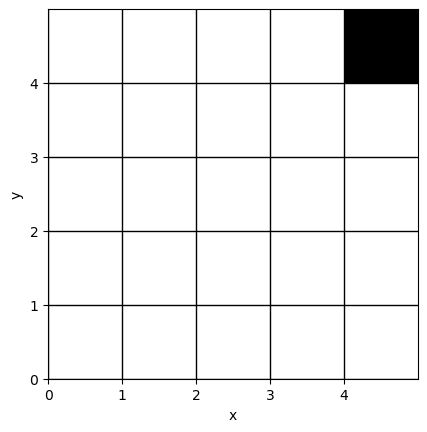

In [10]:
# Run this cell to visualize the grid-world
grid_size = 5  # The grid size
goal_state = (4, 4)  # the goal state

values = np.zeros((grid_size, grid_size))  # Create a grid to store the values for each state

values[goal_state]=10
plt.imshow(values, cmap='Greys', extent=[0, 5, 5, 0], interpolation='None')
plt.grid(True, color='black', linewidth=1)
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.show()

Implement a linear feature-based architecture for the parametric value function approximation.

The features of a particular state contain its Cartesian coordinates, as well as the steps required to reach the goal state, and normalized as a vector with sum 1, that is,

$$ \phi(x) = \text{Normalize}([x_1, x_2, |x_1-x_1^*|+|x_2-x_2^*|]^T) $$

where $x_1$ and $x_2$ are the Cartesian coordinates of position $x$, and $x_1^*$ and $x_2^*$ are the Cartesian coordinates of goal state. The associated linear architecture becomes

$$\tilde{J}(\phi(x), r) = r^T \phi(x)$$

In [13]:
# Define the feature mapping for each state
def feature_mapping(state):
    ### START CODE HERE ###
    x1, x2 = state
    x1_star, x2_star = goal_state
    features = np.array([x1, x2, np.abs(x1 - x1_star) + np.abs(x2 - x2_star)])
    return features / np.sum(features)
    ### END CODE HERE ###

print(feature_mapping((1,1)))

[0.125 0.125 0.75 ]


In [14]:
weights = np.zeros(3)  # Initialize the weight vector with zeros
max_steps = 1000  # The number of iterations
learning_rate = 0.01  # update step size

The weights are updated offline by gradient descent. The gradient of the squared error $\Phi(r)=\frac{1}{2}(J(x)-\tilde{J}(x))^2$ is computed by

$$\nabla\Phi(r)=\phi(x)(r^T \phi(x)-J(x))$$

where $J(x)$ is computed by Bellman equation.

In [32]:
"""Value function approximation"""
for step in range(max_steps):
    current_state = np.random.randint(0, grid_size, size=2)  # Generate a random state from the grid

    features = feature_mapping(current_state)  # Calculate the feature vector for the current state

    value = np.dot(features, weights)  # Calculate the value function approximation for the current state
    
    if tuple(current_state) == goal_state:
        target = 10  # Target value is 10 when the goal state is reached
    else:
        
        # Hint: calculate the target value for the current state
        ### START CODE HERE ###       
        target = -1 * (np.abs(goal_state[0] - current_state[0]) + np.abs(goal_state[1] - current_state[1]))
        ### END CODE HERE ###
        
    # Hint: update the weights using gradient descent
    ### START CODE HERE ###
    delta = target - value
    weights += learning_rate * delta * features
    ### END CODE HERE ###
    

In [33]:
# Calculate the value function approximation for each state

for i in range(grid_size):
    for j in range(grid_size):
        
        # Hint: use "np.dot(features, weights)"
        ### START CODE HERE ###
        current_state = (i, j)
        features = feature_mapping(current_state)
        values[(i,j)] = np.dot(features, weights)
        
        
        ### END CODE HERE ###

print(values)

[[-8.05419172 -6.97316648 -5.89214124 -4.811116   -3.73009076]
 [-6.97910725 -5.89808201 -4.81705677 -3.73603153 -2.65500629]
 [-5.90402277 -4.82299753 -3.74197229 -2.66094705 -1.57992181]
 [-4.82893829 -3.74791305 -2.66688781 -1.58586257 -0.50483733]
 [-3.75385381 -2.67282857 -1.59180333 -0.51077809  0.57024715]]


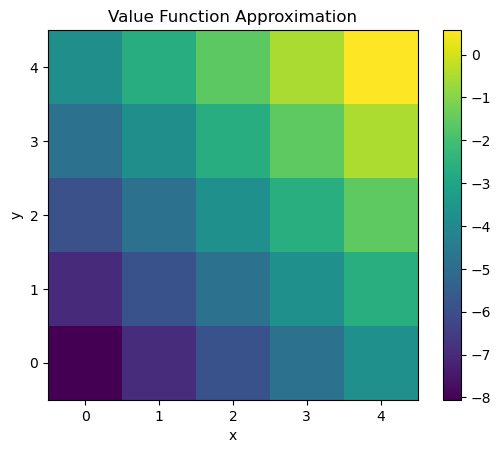

In [34]:
"""Visualization"""
plt.imshow(values, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Value Function Approximation')
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.show()